<a href="https://colab.research.google.com/github/rohitm487/Causal_Inference_in_Python/blob/main/Causal_inference_Controlled_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

# Preview the data
df.drop(columns=['Unnamed: 0'], inplace=True)  # Remove the index column
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA


In [ ]:
print(df.columns)


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


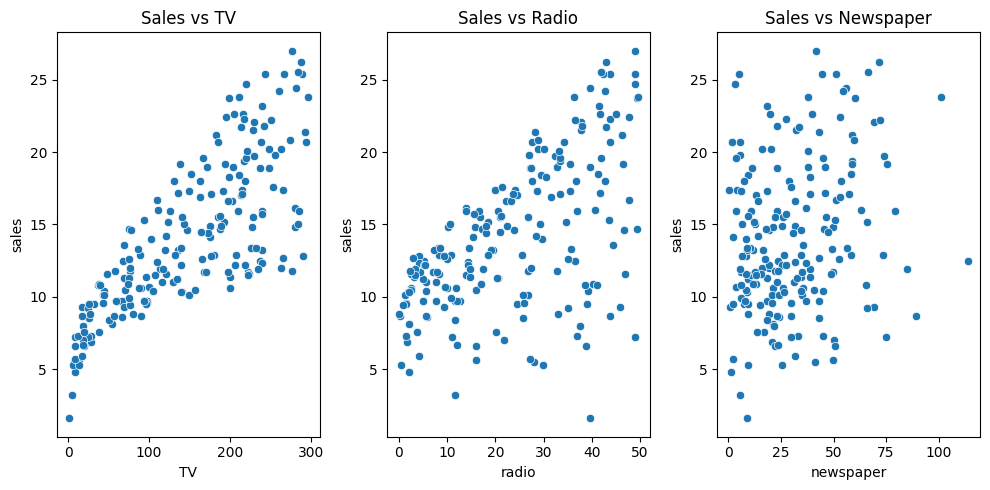

In [ ]:
# Scatter plots for the relationship between different media and Sales
plt.figure(figsize=(10, 5))

# Sales vs TV
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='sales', data=df)  # Ensure 'sales' matches the actual column name
plt.title('Sales vs TV')

# Sales vs Radio
plt.subplot(1, 3, 2)
sns.scatterplot(x='radio', y='sales', data=df)
plt.title('Sales vs Radio')

# Sales vs Newspaper
plt.subplot(1, 3, 3)
sns.scatterplot(x='newspaper', y='sales', data=df)
plt.title('Sales vs Newspaper')

plt.tight_layout()
plt.show()


# Simple Linear Regression: Sales vs TV

In [ ]:
# Simple Linear Regression: Sales vs TV
model_tv = smf.ols('sales ~ TV', data=df).fit()
print(model_tv.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        17:16:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

## Adding Controls: Sales ~ TV + Radio

In [ ]:
# Multiple Linear Regression: Sales ~ TV + Radio
model_tv_radio = smf.ols('sales ~ TV + radio', data=df).fit()
print(model_tv_radio.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           4.83e-98
Time:                        17:16:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

## Full Model: Sales ~ TV + Radio + Newspaper

In [ ]:
# Full Model: Sales ~ TV + Radio + Newspaper
model_full = smf.ols('sales ~ TV + radio + newspaper', data=df).fit()
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        17:17:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## Regression Discontinuity Analysis (Simulated)

Since the dataset doesn't naturally contain a discontinuity, we'll simulate one by creating a threshold variable and splitting it into groups for a regression discontinuity design.

**4.1 Simulate a Threshold (e.g., TV budget > 150)**

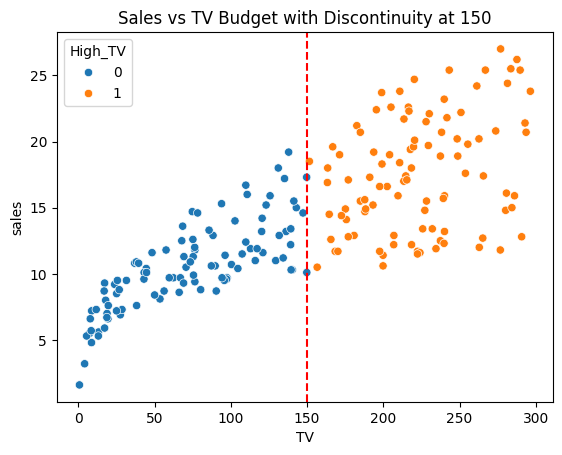

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     105.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.06e-40
Time:                        17:19:00   Log-Likelihood:                -517.54
No. Observations:                 200   AIC:                             1043.
Df Residuals:                     196   BIC:                             1056.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3612      0.621     10.239      0.0

In [ ]:
# Simulate a threshold on TV budget
df['High_TV'] = np.where(df['TV'] > 150, 1, 0)

# Visualize the relationship between TV budget and Sales
sns.scatterplot(x='TV', y='sales', hue='High_TV', data=df)
plt.axvline(x=150, linestyle='--', color='red')
plt.title("Sales vs TV Budget with Discontinuity at 150")
plt.show()

# Regression Discontinuity: Sales ~ TV + High_TV
model_rd = smf.ols('sales ~ TV * High_TV', data=df).fit()
print(model_rd.summary())


# 5. Difference-in-Differences (Simulated)
This dataset doesn't directly lend itself to difference-in-differences, but we can simulate it by introducing a time variable and two groups.

In [ ]:
# Simulate a time and group variable
np.random.seed(42)
df['Time'] = np.random.choice([1, 2], size=len(df))  # Two time periods
df['Group'] = np.random.choice([0, 1], size=len(df))  # Two groups

In [ ]:
model_did = smf.ols('sales ~ Time + Group + Time*Group', data=df).fit()
print(model_did.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.527
Date:                Thu, 10 Oct 2024   Prob (F-statistic):              0.209
Time:                        17:20:19   Log-Likelihood:                -611.38
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     196   BIC:                             1244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2374      1.637      9.306      0.0

# Instrumental Variable (IV) Analysis (Simulated)

In this case, we can simulate an instrumental variable for one of the features.



In [ ]:
# Simulate an instrumental variable for 'Radio'
np.random.seed(42)
df['IV'] = df['radio'] + np.random.normal(0, 1, size=len(df))

# First Stage: Predict Radio using IV
model_first_stage = smf.ols('radio ~ IV', data=df).fit()
df['Radio_hat'] = model_first_stage.predict(df['IV'])

# Second Stage: Sales ~ Predicted Radio (Radio_hat)
model_second_stage = smf.ols('sales ~ Radio_hat', data=df).fit()
print(model_second_stage.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.34
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           3.19e-19
Time:                        17:21:13   Log-Likelihood:                -573.03
No. Observations:                 200   AIC:                             1150.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2877      0.563     16.502      0.0